# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [244]:
%matplotlib inline
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load the data into a DataFrame
# pd.read_csv()

## Transform the dates if needed, e.g.
# df["Date"] = pd.to_datetime(df["Date"], format="%m-%d-%y")
#different separator format off

In [245]:
pwd

u'/Users/marthataylor/DSI-CHI-1/projects/weekly-projects/project-03/starter-code'

In [246]:
data =pd.read_csv('../Datasets/Iowa_Liquor_Sales_reduced.csv')

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [248]:
data.head(3)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,$9.99,$14.99,12,$179.88,4.5,1.19
1,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,$12.50,$18.75,2,$37.50,2.0,0.53
2,03/31/2016,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,$5.97,$8.96,6,$53.76,10.5,2.77


In [249]:
data["Date"] = pd.to_datetime(data["Date"], format="%m/%d/%Y")

In [250]:
data.columns

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')

In [ ]:
#clean up before describing. The dollar amounts will be converted to float
#Store numbers will be converted to string


In [251]:
data['State Bottle Retail'] = data['State Bottle Retail'].str.replace('$', '').astype(float)
data['State Bottle Cost'] = data['State Bottle Cost'].str.replace('$', '').astype(float)
data['Sale (Dollars)'] = data['Sale (Dollars)'].str.replace('$', '').astype(float)

In [252]:

# for item in lstWeeks:
#     print 'For %s' %item
#     print billboard.dtypes[item] 
#     print billboard[item].isnull().sum()
#     print billboard[item].describe()
#     print ' '

lstColumns = []
i = 0
for labels in data.columns:
    lstColumns.append(labels)
    i = i + 1
for item in lstColumns:
    print 'For %s  *********' %item
    print data.dtypes[item]
    print data[item].isnull().sum()
    print data[item].describe()
    print ' '


    
        

For Date  *********
datetime64[ns]
0
count                 2709552
unique                    284
top       2015-12-01 00:00:00
freq                    15588
first     2015-01-05 00:00:00
last      2016-03-31 00:00:00
Name: Date, dtype: object
 
For Store Number  *********
int64
0
count    2.709552e+06
mean     3.589071e+03
std      9.491083e+02
min      2.106000e+03
25%      2.604000e+03
50%      3.721000e+03
75%      4.382000e+03
max      9.023000e+03
Name: Store Number, dtype: float64
 
For City  *********
object
0
count        2709552
unique           386
top       DES MOINES
freq          237791
Name: City, dtype: object
 
For Zip Code  *********
object
0
count     2709552
unique        771
top         50010
freq        67815
Name: Zip Code, dtype: object
 
For County Number  *********
float64
10913
count    2.698639e+06
mean     5.726086e+01
std      2.732565e+01
min      1.000000e+00
25%               NaN
50%               NaN
75%               NaN
max      9.900000e+01
Name: Cou

In [253]:
data.columns

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')

In [254]:
#adding the costs in order to calculate the profit
data['totalCost']= (data['Bottles Sold']*data['State Bottle Cost'])
data['profit']=(data['Sale (Dollars)']-data['totalCost'])
data['Profit Margin']=(data['profit']/data['Sale (Dollars)']*100)
data.head(5)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),totalCost,profit,Profit Margin
0,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,...,375,9.99,14.99,12,179.88,4.5,1.19,119.88,60.00,33.355570
1,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,...,1000,12.50,18.75,2,37.50,2.0,0.53,25.00,12.50,33.333333
2,2016-03-31,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,...,1750,5.97,8.96,6,53.76,10.5,2.77,35.82,17.94,33.370536
3,2016-03-31,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,205,40597,...,200,2.24,3.36,48,161.28,9.6,2.54,107.52,53.76,33.333333
4,2016-03-31,5240,WEST BRANCH,52358,NaN,NaN,1081200.0,CREAM LIQUEURS,305,73055,...,750,12.50,18.75,6,112.50,4.5,1.19,75.00,37.50,33.333333


In [ ]:
#saving county sales to csv for upload to tableau
data.to_csv('stateData.csv')

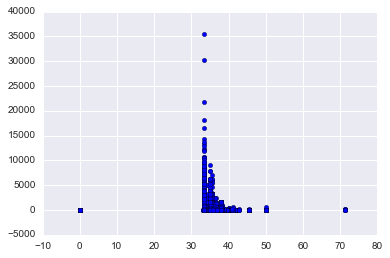

In [255]:
plt.scatter(data['Profit Margin'],data['profit'])
xlabel=('Mark up')
ylable=('profit');


In [229]:
data['Profit Margin'].max()

71.428571428571431

In [228]:
data['Profit Margin'].describe()

count    2.709552e+06
mean     3.342122e+01
std      5.044588e-01
min     -1.409807e-14
25%      3.333333e+01
50%      3.333333e+01
75%      3.336026e+01
max      7.142857e+01
Name: Profit Margin, dtype: float64

In [256]:
#making a table that mirrors the by county
# summaryForState= data.groupby('Store Number')
# summaryForState.head(10)
forStateByStoreBottles=pd.pivot_table(data,
                        index=['Store Number'],
                        values = ['Bottles Sold'], aggfunc=np.sum)
forStateByStoreSales=pd.pivot_table(data,
                        index=['Store Number'],
                        values = ['Sale (Dollars)'], aggfunc=np.sum)

forStateByStoreBottles=forStateByStoreBottles.reset_index()
forStateByStoreSales=forStateByStoreSales.reset_index()


In [257]:
#create table store number and its county
tempTable = data[['Store Number','County Number']]


In [258]:
tempTable.head(10)


,Store Number,County Number
0,5029,82.0
1,5029,82.0
2,4959,7.0
3,2190,77.0
4,5240,NaN
5,4988,7.0
6,3993,7.0
7,5029,82.0
8,5144,77.0
9,5029,82.0


In [ ]:
#I didn't get to finish this part I was going to compare my county model
#to the state model

In [259]:
stateSales = pd.concat([forStateByStoreBottles,forStateByStoreSales], axis =1)

In [260]:

stateSales.sort_values('Bottles Sold', ascending = False).head(4)

,Store Number,Bottles Sold,Store Number,Sale (Dollars)
125,2633,744424,2633,1.228265e+07
1033,4829,657032,4829,1.108553e+07
36,2512,356873,2512,5.206377e+06
194,3385,296426,3385,4.759188e+06


In [261]:
#the start of building the table to do the analysis
profitTable=pd.pivot_table(data,
                        index=['County Number'],
                        values = ['profit'], aggfunc=[np.mean,np.sum])

profitTable.head()

,mean,sum
,profit,profit
County Number,,
1.0,31.834981,177416.35
2.0,18.262799,40908.67
3.0,31.382380,336293.58
4.0,32.321840,338571.27
5.0,28.834839,70731.86


In [262]:
byCountyBottles = data.groupby('County Number')['Bottles Sold'].sum()
byCountyBottles.head()

County Number
1.0    43503
2.0    10173
3.0    74610
4.0    81618
5.0    18552
Name: Bottles Sold, dtype: int64

In [263]:
countyStores= data.groupby('County Number')['Store Number'].nunique()
countyStores.head()

County Number
1.0    8
2.0    1
3.0    6
4.0    6
5.0    3
Name: Store Number, dtype: int64

In [264]:
byCountyVol = data.groupby('County Number')['Volume Sold (Liters)'].sum()
byCountySales=data.groupby('County Number')['Sale (Dollars)'].sum()


In [278]:
countySales = pd.concat([profitTable, byCountyBottles, byCountyVol,
                        byCountySales, countyStores], axis =1)

In [279]:
countySales.head(5)

,"(mean, profit)","(sum, profit)",Bottles Sold,Volume Sold (Liters),Sale (Dollars),Store Number
County Number,,,,,,
1.0,31.834981,177416.35,43503,42233.79,530180.13,8
2.0,18.262799,40908.67,10173,9191.49,122431.29,1
3.0,31.382380,336293.58,74610,81150.41,1003696.58,6
4.0,32.321840,338571.27,81618,75244.65,1012266.23,6
5.0,28.834839,70731.86,18552,18283.05,210962.80,3


In [280]:
countySales.columns

Index([   (u'mean', u'profit'),     (u'sum', u'profit'),
               u'Bottles Sold', u'Volume Sold (Liters)',
             u'Sale (Dollars)',         u'Store Number'],
      dtype='object')

In [281]:
countySales=countySales.reset_index()
#countiesProfitPivot = countiesProfitPivot.reset_index()
countySales.columns=['County Number',
                     'mean profit',
                     'sum profit',
                     'bottles Sold',
                     'volume sold liters', 
                     'Sales Dollars',
                     'Nu Stores',]

In [282]:
countySales.columns


Index([u'County Number', u'mean profit', u'sum profit', u'bottles Sold',
       u'volume sold liters', u'Sales Dollars', u'Nu Stores'],
      dtype='object')

In [283]:
countySales['Sales Per Store'] = (countySales['Sales Dollars']/countySales['Nu Stores'])
countySales['Profit Per Store'] = (countySales['sum profit']/countySales['Nu Stores'])
countySales['Volume sales per store']=(countySales['volume sold liters']/countySales['Nu Stores'])
countySales['Bottles Per Store'] = (countySales['bottles Sold']/countySales['Nu Stores'])
countySales.head(5)

,County Number,mean profit,sum profit,bottles Sold,volume sold liters,Sales Dollars,Nu Stores,Sales Per Store,Profit Per Store,Volume sales per store,Bottles Per Store
0,1.0,31.834981,177416.35,43503,42233.79,530180.13,8,66272.516250,22177.043750,5279.223750,5437.875
1,2.0,18.262799,40908.67,10173,9191.49,122431.29,1,122431.290000,40908.670000,9191.490000,10173.000
2,3.0,31.382380,336293.58,74610,81150.41,1003696.58,6,167282.763333,56048.930000,13525.068333,12435.000
3,4.0,32.321840,338571.27,81618,75244.65,1012266.23,6,168711.038333,56428.545000,12540.775000,13603.000
4,5.0,28.834839,70731.86,18552,18283.05,210962.80,3,70320.933333,23577.286667,6094.350000,6184.000


In [284]:
countySales=countySales.reset_index()
countySales.columns=['Index1',
                     'County Number',
                     'mean profit',
                     'sum profit',
                     'bottles Sold',
                     'volume sold liters', 
                     'Sales Dollars',
                     'Nu Stores',
                     'Sales Per Store',
                     'Profit Per Store', 
                     'Volume Sales per Store',
                     'Bottles Sold per Store']

In [285]:
countySales.head(5)

,Index1,County Number,mean profit,sum profit,bottles Sold,volume sold liters,Sales Dollars,Nu Stores,Sales Per Store,Profit Per Store,Volume Sales per Store,Bottles Sold per Store
0,0,1.0,31.834981,177416.35,43503,42233.79,530180.13,8,66272.516250,22177.043750,5279.223750,5437.875
1,1,2.0,18.262799,40908.67,10173,9191.49,122431.29,1,122431.290000,40908.670000,9191.490000,10173.000
2,2,3.0,31.382380,336293.58,74610,81150.41,1003696.58,6,167282.763333,56048.930000,13525.068333,12435.000
3,3,4.0,32.321840,338571.27,81618,75244.65,1012266.23,6,168711.038333,56428.545000,12540.775000,13603.000
4,4,5.0,28.834839,70731.86,18552,18283.05,210962.80,3,70320.933333,23577.286667,6094.350000,6184.000


In [286]:
#saving county sales to csv for upload to tableau
countySales.to_csv('countySales.csv')

In [287]:
countySales.columns

Index([u'Index1', u'County Number', u'mean profit', u'sum profit',
       u'bottles Sold', u'volume sold liters', u'Sales Dollars', u'Nu Stores',
       u'Sales Per Store', u'Profit Per Store', u'Volume Sales per Store',
       u'Bottles Sold per Store'],
      dtype='object')

In [288]:
countySales.head(5)

,Index1,County Number,mean profit,sum profit,bottles Sold,volume sold liters,Sales Dollars,Nu Stores,Sales Per Store,Profit Per Store,Volume Sales per Store,Bottles Sold per Store
0,0,1.0,31.834981,177416.35,43503,42233.79,530180.13,8,66272.516250,22177.043750,5279.223750,5437.875
1,1,2.0,18.262799,40908.67,10173,9191.49,122431.29,1,122431.290000,40908.670000,9191.490000,10173.000
2,2,3.0,31.382380,336293.58,74610,81150.41,1003696.58,6,167282.763333,56048.930000,13525.068333,12435.000
3,3,4.0,32.321840,338571.27,81618,75244.65,1012266.23,6,168711.038333,56428.545000,12540.775000,13603.000
4,4,5.0,28.834839,70731.86,18552,18283.05,210962.80,3,70320.933333,23577.286667,6094.350000,6184.000


In [289]:
#saving county sales to csv for upload to tableau
countySales.to_csv('countySales.csv')

In [ ]:
#countyDummies = pd.get_dummies(data['County Number'])
#did do dummies -beyone my brain power at 5 am.


In [242]:
countySales.columns

Index([u'index', u'Store Number', u'Sale (Dollars)'], dtype='object')

In [290]:
countySales.describe()

,Index1,County Number,mean profit,sum profit,bottles Sold,volume sold liters,Sales Dollars,Nu Stores,Sales Per Store,Profit Per Store,Volume Sales per Store,Bottles Sold per Store
count,99.000000,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,99.000000,99.000000,99.000000,99.000000,99.000000
mean,49.000000,50.000000,34.989117,1.177198e+06,2.682589e+05,2.433666e+05,3.521452e+06,13.939394,175054.703660,58576.577569,13040.469994,13326.679317
std,28.722813,28.722813,10.107143,3.065236e+06,6.927955e+05,5.932126e+05,9.176022e+06,25.033373,89925.550930,30064.707897,6073.235146,6444.434368
min,0.000000,1.000000,15.987410,9.940240e+03,3.088000e+03,2.115050e+03,2.975710e+04,1.000000,29757.100000,9940.240000,2115.050000,3088.000000
25%,24.500000,25.500000,28.999623,1.830150e+05,4.562500e+04,4.448244e+04,5.470660e+05,5.000000,95937.342786,32089.905857,8297.165643,8119.916667
50%,49.000000,50.000000,33.070079,3.452164e+05,8.161800e+04,8.115041e+04,1.029072e+06,7.000000,162878.882500,54401.570000,12422.330000,12334.900000
75%,73.500000,74.500000,42.428453,7.265732e+05,1.602550e+05,1.667272e+05,2.167493e+06,12.500000,239463.892143,80111.910357,17640.428333,18103.556548
max,98.000000,99.000000,81.315748,2.621364e+07,5.818078e+06,5.009660e+06,7.847391e+07,207.000000,406841.044340,135905.340377,27021.547000,30530.791045


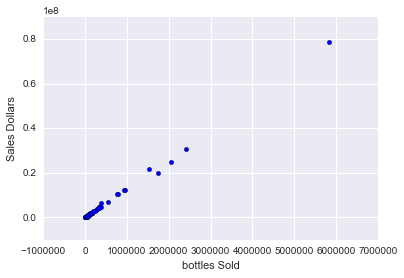

In [291]:
plt.scatter(countySales['bottles Sold'],countySales['Sales Dollars'])
plt.xlabel('bottles Sold');
plt.ylabel('Sales Dollars');

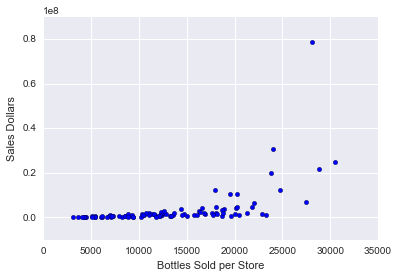

In [292]:
plt.scatter(countySales['Bottles Sold per Store'],countySales['Sales Dollars'])
plt.xlabel('Bottles Sold per Store');
plt.ylabel('Sales Dollars');

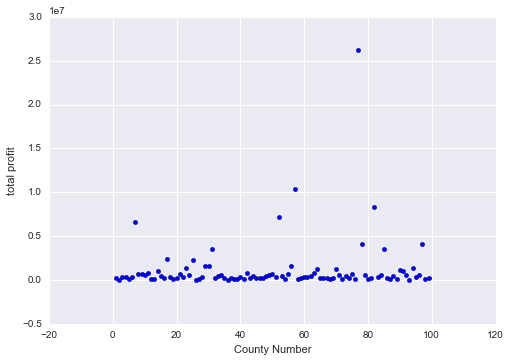

In [26]:
plt.scatter(countySales['County Number'],countySales['sum profit'])
plt.xlabel('County Number');
plt.ylabel('total profit');

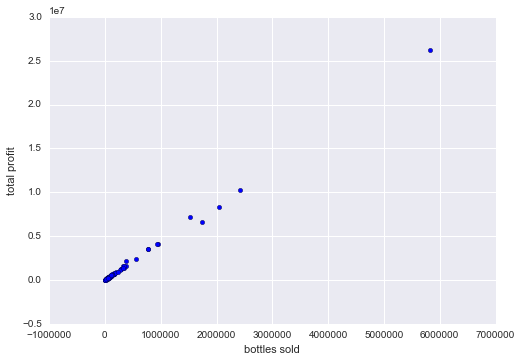

In [27]:
plt.scatter(countySales['bottles Sold'],countySales['sum profit'])
plt.xlabel('bottles sold');
plt.ylabel('total profit')

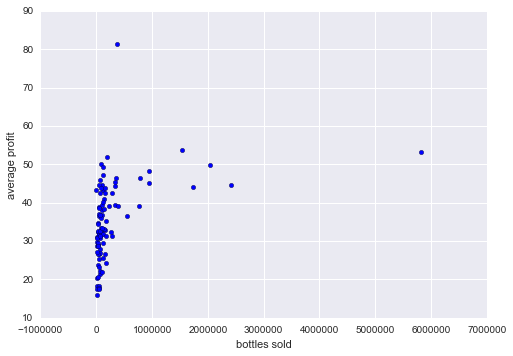

In [28]:
plt.scatter(countySales['bottles Sold'],countySales['mean profit'])
plt.xlabel('bottles sold');
plt.ylabel('average profit')

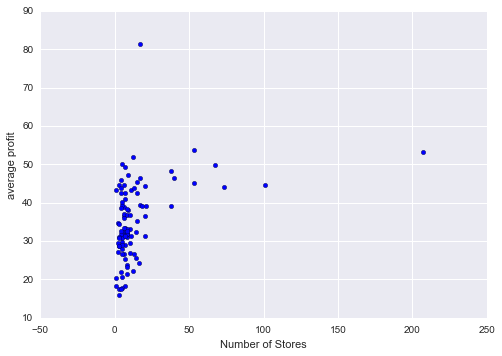

In [32]:
plt.scatter(countySales['Nu Stores'],countySales['mean profit'])
plt.xlabel('Number of Stores');
plt.ylabel('average profit')

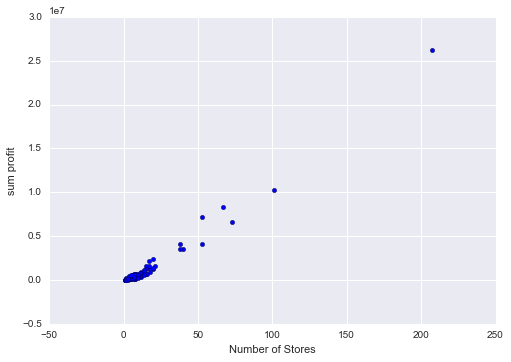

In [33]:
plt.scatter(countySales['Nu Stores'],countySales['sum profit'])
plt.xlabel('Number of Stores');
plt.ylabel('sum profit')

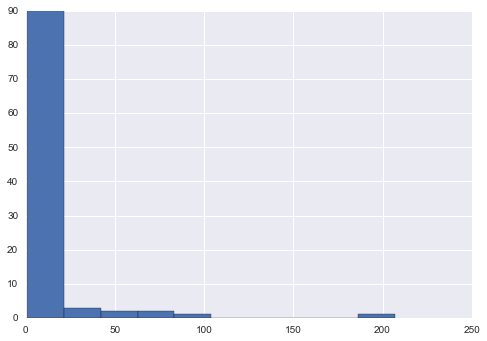

In [31]:
plt.hist(countySales['Nu Stores']);

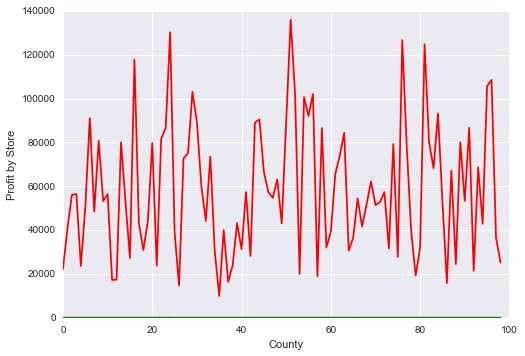

In [72]:
plt.plot(countySales['Profit Per Store'],color = 'red')
plt.xlabel('County')
plt.ylabel('Profit by Store');

In [39]:
#analysis on per store sales
totalStoreSales = data['Sale (Dollars)'].sum()
totalNuStores = countySales['Nu Stores'].sum()
print totalStoreSales
print totalNuStores

349854916.289
1380


In [41]:
salesPerStore=totalStoreSales/totalNuStores
salesPerStore

253518.0552818202

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

It would have been more interesting to have some other variables - income,
density, education level.  In the current data there were no suprises. One would expect there to be a positive relationshiop between bottles sold and profit.  

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [ ]:
see below

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [123]:
from scipy import stats
from sklearn import datasets
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error


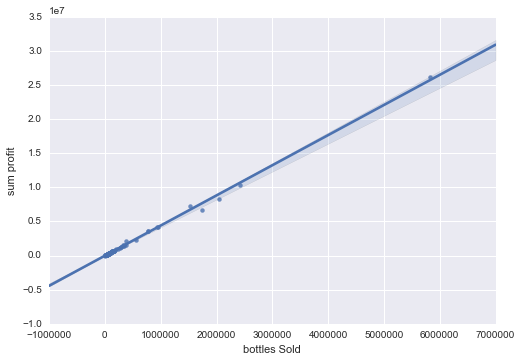

In [96]:
sns.regplot(x='bottles Sold',y='sum profit', data =  countySales);

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sum profit   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.031e+04
Date:                Sun, 16 Oct 2016   Prob (F-statistic):          5.74e-130
Time:                        11:03:58   Log-Likelihood:                -1327.4
No. Observations:                  99   AIC:                             2657.
Df Residuals:                      98   BIC:                             2659.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
bottles Sold     4.4143      0.022    200.772      0.000         4.371     4.458
==============================================================================
Omnibus:                       82.163   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1594.277
Skew:                          -2.217   Prob(JB):                         0.00
Kurtosis:                      22.153   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

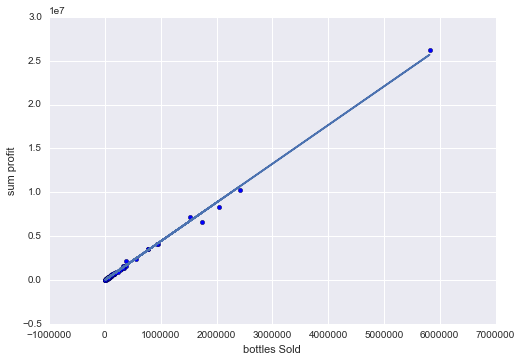

In [97]:
#model = sm.OLS(countySales['mean profit',x='bottles Sold')
X = countySales[['bottles Sold']]
y = countySales['sum profit']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
#model.summary() to show some stuff

# Plot the data and the best fit line
## The data
plt.scatter(X, y)
## The line / model
plt.plot(X, predictions)
plt.ylabel('sum profit')
plt.xlabel('bottles Sold');
model.summary()

In [98]:
# doing the statsmodels 
#below is the linear regression model
r2_list={}

for first_pair in countySales.columns:
    for second_pair in countySales.columns:
        if first_pair != second_pair:
            y=countySales[first_pair]
            x=countySales[second_pair]
            model=sm.OLS(y,x).fit()
            r2_list['%s_by_%s' % (first_pair, second_pair)] = model.rsquared
       
print len(r2_list)
r2_list


maximum = max(r2_list, key=r2_list.get)  
print(maximum, r2_list[maximum])

minimum = min(r2_list, key=r2_list.get)  
print(minimum, r2_list[minimum])

110
('Sales Dollars_by_sum profit', 0.99999982307251878)
('Sales Dollars_by_County Number', 0.13441109950820784)


In [99]:
r2_list

{'Bottles Sold per Store_by_County Number': 0.64384493371992257,
 'Bottles Sold per Store_by_Nu Stores': 0.40389398421781109,
 'Bottles Sold per Store_by_Profit Per Store': 0.99385857370621189,
 'Bottles Sold per Store_by_Sales Dollars': 0.29513892800801034,
 'Bottles Sold per Store_by_Sales Per Store': 0.99388156580266307,
 'Bottles Sold per Store_by_Volume Sales per Store': 0.99059098044474037,
 'Bottles Sold per Store_by_bottles Sold': 0.29884199673890666,
 'Bottles Sold per Store_by_mean profit': 0.88855130698976603,
 'Bottles Sold per Store_by_sum profit': 0.29538336282490807,
 'Bottles Sold per Store_by_volume sold liters': 0.31855795583340463,
 'County Number_by_Bottles Sold per Store': 0.64384493371992257,
 'County Number_by_Nu Stores': 0.22147431021231767,
 'County Number_by_Profit Per Store': 0.62877269376428768,
 'County Number_by_Sales Dollars': 0.13441109950820795,
 'County Number_by_Sales Per Store': 0.62883474517199112,
 'County Number_by_Volume Sales per Store': 0.64181

In [79]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Profit Per Store   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.119e+07
Date:                Sun, 16 Oct 2016   Prob (F-statistic):          5.29e-282
Time:                        09:33:26   Log-Likelihood:                -587.05
No. Observations:                  99   AIC:                             1176.
Df Residuals:                      98   BIC:                             1179.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Sales Per Store     0.3346   4.68e-05   7154.941      0.000         0.334     0.335
==============================================================================
Omnibus:                        4.447   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                5.756
Skew:                           0.043   Prob(JB):                       0.0562
Kurtosis:                       4.178   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Now I am going to see if multiple variables have a relationship with total
#sales.  I decided only to focus on total sales because the marketup seems 
#fairly consistent.  



In [116]:
countySales.columns

Index([u'index0', u'Index1', u'County Number', u'mean profit', u'sum profit',
       u'bottles Sold', u'volume sold liters', u'Sales Dollars', u'Nu Stores',
       u'Sales Per Store', u'Profit Per Store', u'Volume Sales per Store',
       u'Bottles Sold per Store'],
      dtype='object')

0.997571612318


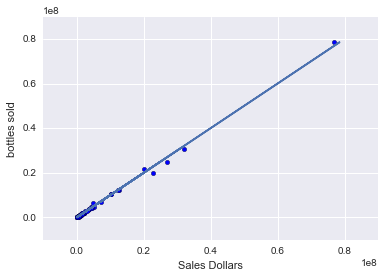

In [293]:
X = countySales['bottles Sold']
y = countySales["Sales Dollars"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print model.rsquared

plt.scatter(predictions, y)
plt.plot(y, y)
plt.ylabel('bottles sold')
plt.xlabel('Sales Dollars');

0.997572373784


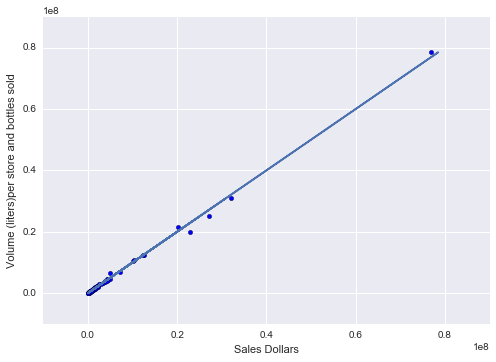

In [122]:
#print countySales.columns
X = countySales[["Volume Sales per Store", 'bottles Sold']]
y = countySales["Sales Dollars"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print model.rsquared

plt.scatter(predictions, y)
plt.plot(y, y)
plt.ylabel('Volume (liters)per store and bottles sold')
plt.xlabel('Sales Dollars');

In [125]:
# print "RMSE:", mean_squared_error(y, predictions)
# print "MAE:", mean_absolute_error(y, predictions)
model.summary()
#rsqured - the proportion of the variance in sales that is predictible from
#volumn (liter) sales and bottles sold.
#we can look at them individually.  
#Bottles sold per store Rsquared = .9938
#Volume (liter) sold Rsqured is = 99.81
#this is about the same as adding both variables


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Sales Dollars   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.993e+04
Date:                Sun, 16 Oct 2016   Prob (F-statistic):          1.52e-127
Time:                        17:17:22   Log-Likelihood:                -1436.0
No. Observations:                  99   AIC:                             2876.
Df Residuals:                      97   BIC:                             2881.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Volume Sales per Store    -0.6866      3.936     -0.174      0.862        -8.499     7.126
bottles Sold              13.2201      0.076    172.841      0.000        13.068    13.372
==============================================================================
Omnibus:                       82.916   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1615.843
Skew:                          -2.247   Prob(JB):                         0.00
Kurtosis:                      22.275   Cond. No.                         59.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
countySales.columns

Index([u'index0', u'Index1', u'County Number', u'mean profit', u'sum profit',
       u'bottles Sold', u'volume sold liters', u'Sales Dollars', u'Nu Stores',
       u'Sales Per Store', u'Profit Per Store', u'Volume Sales per Store',
       u'Bottles Sold per Store'],
      dtype='object')

In [ ]:
#what counties
#if we know that either volumne (liter) sales per store or bottles sold 
#is related to total sales then the top 3 counties are below

In [127]:
countySales.sort_values(by='bottles Sold', ascending=False).head(10)

,index0,Index1,County Number,mean profit,sum profit,bottles Sold,volume sold liters,Sales Dollars,Nu Stores,Sales Per Store,Profit Per Store,Volume Sales per Store,Bottles Sold per Store
76,76,76,77.0,53.284847,2.621364e+07,5818078,5009659.55,7.847391e+07,207,379100.994396,126635.942512,24201.253865,28106.657005
56,56,56,57.0,44.530544,1.031109e+07,2421390,2155821.84,3.085593e+07,101,305504.230693,102090.019109,21344.770693,23974.158416
81,81,81,82.0,49.903702,8.357573e+06,2045563,1622301.15,2.502894e+07,67,373566.262090,124739.888507,24213.450000,30530.791045
6,6,6,7.0,44.045797,6.648537e+06,1735197,1341144.82,1.989110e+07,73,272480.856849,91075.847260,18371.846849,23769.821918
51,51,51,52.0,53.805804,7.202983e+06,1527109,1362106.24,2.156258e+07,53,406841.044340,135905.340377,25700.117736,28813.377358
77,77,77,78.0,45.199028,4.148367e+06,951506,835287.77,1.242305e+07,53,234397.130566,78271.072264,15760.146604,17952.943396
96,96,96,97.0,48.320387,4.123710e+06,939206,822017.42,1.234449e+07,38,324855.108947,108518.688421,21632.037368,24715.947368
30,30,30,31.0,46.569536,3.565410e+06,779839,749256.29,1.066283e+07,40,266570.844250,89135.256000,18731.407250,19495.975000
84,84,84,85.0,39.227337,3.541601e+06,770265,747705.43,1.059031e+07,38,278692.250000,93200.023947,19676.458684,20270.131579
16,16,16,17.0,36.587451,2.355573e+06,550337,540430.94,7.039657e+06,20,351982.861000,117778.665000,27021.547000,27516.850000


In [156]:
#how does our choice stack up to if we just look at where the top stores are
storesStatewide= data['Store Number'].nunique()
storesStatewide

1403

In [152]:
stateSummary

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),totalCost,profit
0,2016-03-31,5029,DAVENPORT,52806,76,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,9.99,14.99,12,179.88,4.5,1.19,119.88,60.00
1,2016-03-31,5029,DAVENPORT,52806,76,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,12.50,18.75,2,37.50,2.0,0.53,25.00,12.50
2,2016-03-31,4959,CEDAR FALLS,50613,76,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,5.97,8.96,6,53.76,10.5,2.77,35.82,17.94
3,2016-03-31,2190,DES MOINES,50314,76,Polk,1031200.0,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,200,2.24,3.36,48,161.28,9.6,2.54,107.52,53.76
4,2016-03-31,5240,WEST BRANCH,52358,76,NaN,1081200.0,CREAM LIQUEURS,305,73055,Rumchata,750,12.50,18.75,6,112.50,4.5,1.19,75.00,37.50


In [164]:
print 'Average bottles sold per store  ' + str((data['Bottles Sold'].sum())/1403)

Average bottles sold per store19000


## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

In [ ]:
The problem is where to locate a new store in Iowa.  The decision was made to analyze the data at the county level. There are 99 counties in Iowa.

In the analysis the sales per store in each county was analyzed. It was important to look at sales per store in a county and not total sales for a county. An oversaturated market would not yield as much sales as an underserved market. 

Since the state decides the wholesale (cost) prices and the retail prices the margins are consistent throughout the state. The profit margin for each transaction was 33.3%. There are some outliers that should be examined.



In the analysis it was determined that Bottles Sold per Store would be used to predict Sales per Store. The r-square value for that relationship is  'Bottles Sold per Store_by_Sales Per Store': 0.99388156580266307. It is very similar to the relationship between bottles sold per store by volume. In order to simply the process the former was chosen.


The store should be located in County 77
County 77 has 207 stores. The total bottles sold for the county is 5,818,078.  Bottles sold per store is approximately 28,106. The average profit for store is $126,635